<a href="https://colab.research.google.com/github/mxchauhan/Thinkful-Bootcamp-Drills/blob/master/Unit_4_Challenge_Boston_Marathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Upload data and rename data column names

dataPath = ("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2013/results.csv")

data = pd.read_csv(dataPath)

data.drop('ctz', axis=1, inplace=True)
data.drop('name', axis=1, inplace=True)

data.head()

,25k,age,division,10k,gender,half,official,bib,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,9,18.18,M,40.93,90.90,W1,CAN,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,5,30.90,M,64.90,132.50,1,KEN,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,1,30.90,M,64.92,130.37,2,ETH,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,5,18.73,M,42.00,88.43,W2,AUS,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,3,18.18,M,40.57,87.22,W3,JPN,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [0]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data.shape

(16164, 19)

In [0]:
data.columns

Index(['25k', 'age', 'division', '10k', 'gender', 'half', 'official', 'bib',
       'country', 'overall', 'pace', 'state', '30k', '5k', 'genderdiv', '20k',
       '35k', 'city', '40k'],
      dtype='object')

In [0]:
data['5k'] = data['5k'].str.replace('-', 'NaN')

In [0]:
data.state = data.state.fillna('Other')

In [0]:
data['5k'] = data['5k'].astype(float)
data['20k'] = data['5k'].astype(float)
data['35k'] = data['5k'].astype(float)
data['40k'] = data['5k'].astype(float)

In [0]:
# Count NaNs
data.isnull().values.ravel().sum()

265

In [0]:
# Drop the NaNs
data.dropna(inplace=True)

# Check that the inplace transformation worked
data.isnull().values.ravel().sum()

0

In [0]:
for col in data.columns:
  print('\n' + col)
  print(type(data[col][0]))
  print(data[col].unique())


25k
<class 'str'>
['49.87' '77.27' '77.23' ... '144.27' '144.85' '144.95']

age
<class 'numpy.int64'>
[28 30 23 32 39 42 49 40 37 27 26 34 55 46 35 33 48 29 41 18 44 24 21 31
 25 19 36 54 47 43 20 45 52 22 38 50 51 53 56 58 60 57 64 59 61 68 65 66
 69 62 63 72 71 67 75 76 73 70 78 74 80]

division
<class 'numpy.int64'>
[   9    5    1 ... 3695 3363 3471]

10k
<class 'str'>
['18.18' '30.90' '18.73' ... '57.13' '58.70' '57.57']

gender
<class 'str'>
['M' 'F']

half
<class 'str'>
['40.93' '64.90' '64.92' ... '119.25' '120.10' '121.98']

official
<class 'numpy.float64'>
[ 90.9  132.5  130.37 ... 247.13 241.82 247.47]

bib
<class 'str'>
['W1' '1' '2' ... '20870' '20907' '20908']

country
<class 'str'>
['CAN' 'KEN' 'ETH' 'AUS' 'JPN' 'USA' 'RSA' 'POL' 'SUI' 'ESP' 'FRA' 'ITA'
 'ECU' 'RUS' 'MEX' 'BER' 'GBR' 'DEN' 'NED' 'CRC' 'ISL' 'IRL' 'GER' 'AUT'
 'GRE' 'GUA' 'DOM' 'UKR' 'SWE' 'NOR' 'SVK' 'BAH' 'BRA' 'HKG' 'KOR' 'VEN'
 'CZE' 'HUN' 'SLO' 'COL' 'PER' 'SIN' 'CHI' 'FIN' 'CHN' 'BEL' 'ARG' 'UAE'
 

In [0]:
data.describe()

,age,division,official,overall,pace,5k,genderdiv,20k,35k,40k
count,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000
mean,41.639498,1100.748276,208.176219,8433.728583,7.948031,23.425032,4351.620550,23.425032,23.425032,23.425032
std,10.355765,941.712342,23.754117,5052.478203,0.906142,2.466347,2772.741244,2.466347,2.466347,2.466347
min,18.000000,1.000000,85.530000,1.000000,3.270000,8.870000,1.000000,8.870000,8.870000,8.870000
25%,34.000000,363.000000,191.730000,4065.000000,7.320000,21.730000,2032.000000,21.730000,21.730000,21.730000
50%,42.000000,842.000000,209.270000,8255.000000,7.980000,23.630000,4114.000000,23.630000,23.630000,23.630000
75%,49.000000,1560.000000,225.250000,12668.000000,8.600000,25.200000,6316.000000,25.200000,25.200000,25.200000
max,80.000000,3834.000000,284.230000,17598.000000,10.850000,33.220000,10648.000000,33.220000,33.220000,33.220000


In [0]:
data.gender.value_counts()

M    9632
F    6465
Name: gender, dtype: int64

In [0]:
data.country.value_counts()

USA    13115
CAN     1529
GBR      178
JPN      109
MEX      107
GER       86
BRA       80
AUS       77
ITA       76
FRA       64
ESP       51
SWE       48
DEN       45
NED       42
SUI       37
HKG       32
COL       29
IRL       28
SIN       22
VEN       21
AUT       21
NOR       21
CRC       20
KOR       19
CHI       16
ISL       15
RUS       14
POL       14
FIN       12
GUA       12
       ...  
CZE        7
TWN        5
ECU        5
BER        5
ETH        4
ISR        4
SLO        4
LTU        4
MAS        4
CAY        3
PER        3
URU        3
IND        3
ESA        2
UAE        2
HUN        2
UKR        2
DOM        2
EST        2
PAN        2
ARU        2
BAH        2
TRI        1
TCA        1
BOL        1
VGB        1
PHI        1
TUR        1
POR        1
QAT        1
Name: country, Length: 68, dtype: int64

In [0]:
data.age.value_counts()

45    678
46    600
41    578
42    564
50    546
38    540
47    539
40    539
43    505
48    503
35    494
49    493
36    488
51    480
39    477
37    467
44    449
52    409
30    396
33    386
28    380
29    374
27    372
32    369
31    368
34    359
55    340
26    326
56    318
53    310
     ... 
54    276
24    247
57    212
58    187
60    178
23    168
61    132
59    116
62    108
22    101
21     78
63     71
65     56
64     54
20     50
66     37
19     26
68     16
18     13
67     12
70     11
69      8
72      4
75      3
73      3
71      2
80      1
74      1
76      1
78      1
Name: age, Length: 61, dtype: int64

Text(0.5,1,'Distribution of Age')

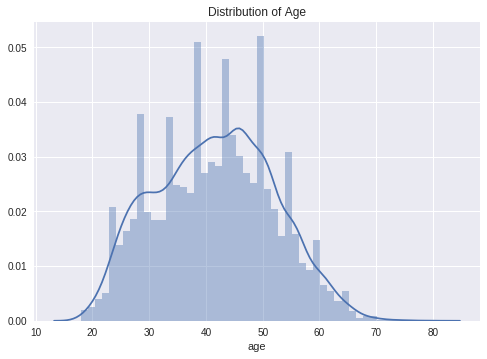

In [0]:
import seaborn as sns

sns.distplot(data["age"])
plt.title('Distribution of Age')

Text(0.5,1,'Distribution of 5k')

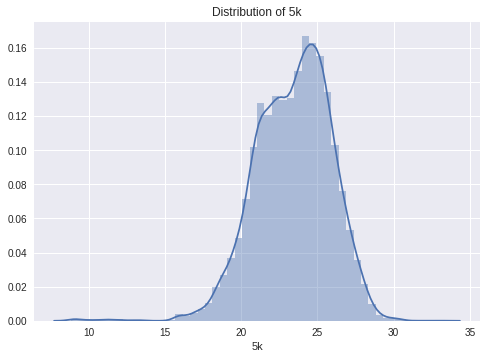

In [0]:
sns.distplot(data["5k"])
plt.title('Distribution of 5k')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


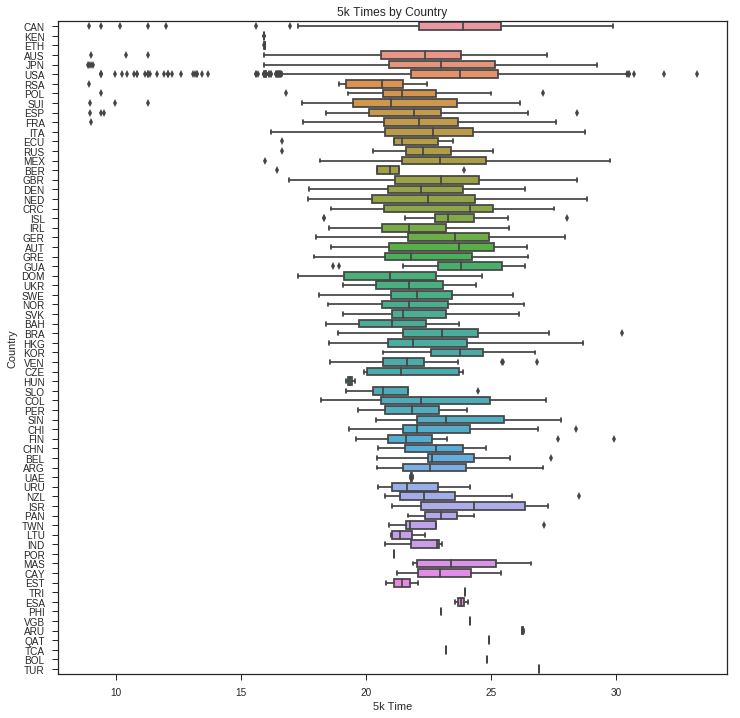

In [0]:
import seaborn as sns

sns.set(style="ticks")
plt.figure(figsize=(12, 12))
sns.boxplot(y='country', x='5k', data=data)
plt.xlabel("5k Time")
plt.ylabel('Country')
plt.title("5k Times by Country")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


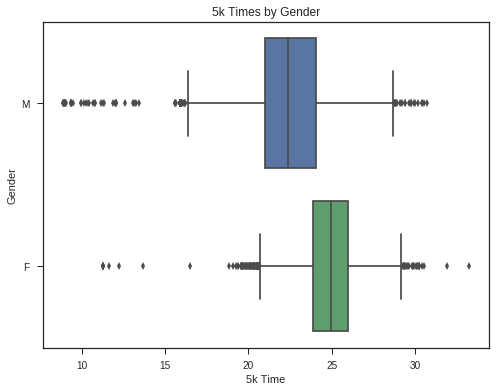

In [0]:
sns.set(style="ticks")
plt.figure(figsize=(8, 6))
sns.boxplot(y='gender', x='5k', data=data)
plt.xlabel("5k Time")
plt.ylabel('Gender')
plt.title("5k Times by Gender")
plt.show()

In [0]:
features = data.drop(['gender', 'bib', 'country', 'state', 'city'], axis=1)

In [0]:
featuresGender = pd.get_dummies(data['gender'])
featuresGender = pd.get_dummies(data['bib'])
featuresCountry = pd.get_dummies(data['country'])
featuresState = pd.get_dummies(data['state'])
featuresCity = pd.get_dummies(data['city'])

In [0]:
featuresAll = pd.concat([features, featuresGender, featuresCountry, featuresState, featuresCity], axis=1)
featuresAll.head()

,25k,age,division,10k,half,official,overall,pace,30k,5k,...,"Zapopan, Jalisco",Zeeland,Zion Grove,Zionsville,Zornheim,Zuckenriet,Zuerich,Zug,Zurich,boston
0,49.87,28,9,18.18,40.93,90.90,9,3.47,62.07,8.90,...,0,0,0,0,0,0,0,0,0,0
1,77.27,30,5,30.90,64.90,132.50,5,5.07,92.97,15.90,...,0,0,0,0,0,0,0,0,0,0
2,77.23,23,1,30.90,64.92,130.37,1,4.98,92.72,15.93,...,0,0,0,0,0,0,0,0,0,0
3,50.50,32,5,18.73,42.00,88.43,5,3.38,61.35,8.98,...,0,0,0,0,0,0,0,0,0,0
4,48.75,39,3,18.18,40.57,87.22,3,3.33,59.92,8.92,...,0,0,0,0,0,0,0,0,0,0


In [0]:
objectColumns = featuresAll.select_dtypes('object')

objectColumns.columns

Index(['25k', '10k', 'half', '30k'], dtype='object')

In [0]:
featuresAll['25k'] = pd.to_numeric(objectColumns['25k'].str.replace('\W', ''))
featuresAll['10k'] =  pd.to_numeric(objectColumns['10k'].str.replace('\W', ''))
featuresAll['half'] = pd.to_numeric(objectColumns['half'].str.replace('\W', ''))
featuresAll['30k'] = pd.to_numeric(objectColumns['30k'].str.replace('\W', ''))

In [0]:
# Scale data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaledTrainData = scaler.fit(featuresAll)

scaledTrainData = scaler.transform(featuresAll)

X = pd.DataFrame(scaledTrainData, columns=[featuresAll.columns])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
X.isnull().values.ravel().sum()

42

In [0]:
X.dropna(inplace=True)

In [0]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(10).fit_transform(X_norm)


In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_pca)
y_kmeans = kmeans.predict(X_pca)
kmeans.cluster_centers_

In [0]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


In [0]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))